In [18]:
library(gap)
library(dplyr)
library(ggplot2)
library(VennDiagram)
library(UpSetR)
library(ggpubr)

Warning message:
“package ‘ggpubr’ was built under R version 3.6.2”

Attaching package: ‘ggpubr’


The following object is masked from ‘package:VennDiagram’:

    rotate




## Panel A - Miami plot of eQTL results. Only the best eQTL per etranscript is plotted. Dashed lines indicate significance cut-off at an FDR of 5%. 

In [2]:
data=read.delim("data/fig2_sex-biased_eQTL_results.txt")
#select top 10 genes
top10m=data %>% top_n(-10,q_males)
top10m
top10f=data %>% top_n(-10,q_females)
top10f

Probe_Id,SNP_females,q_females,CHR,SNP_males,q_males,P_start,P_end
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
ILMN_1651385,rs816063,0.713300,1,rs2295281,0.000012,12073097,12073147
ILMN_1665457,rs7960410,0.000046,12,rs10845821,0.000002,7898953,7899002
ILMN_1672004,rs28490496,0.000294,17,rs75113598,0.000026,48940473,48940522
ILMN_1679826,rs68007865,0.785500,20,rs6050131,0.000256,24940339,24940388
ILMN_1682259,rs7960410,0.000132,12,rs11055602,0.000004,7882292,7883397
ILMN_1736982,rs9395495,0.037110,6,rs4715146,0.000054,13283746,13286378
ILMN_1777721,rs291671,0.225900,20,rs853859,0.000048,31437828,31437877
ILMN_2144116,rs7146688,0.054440,14,rs4243696,0.000218,92630387,92630436
ILMN_2313901,rs258151,0.000002,5,rs171803,0.000060,102365110,102365161


Probe_Id,SNP_females,q_females,CHR,SNP_males,q_males,P_start,P_end
<fct>,<fct>,<dbl>,<int>,<fct>,<dbl>,<int>,<int>
ILMN_1665457,rs7960410,0.000046,12,rs10845821,0.000002,7898953,7899002
ILMN_1675038,rs2839321,0.000022,21,rs60526571,0.119500,48084511,48084563
ILMN_1679520,rs114213616,0.000180,6,rs4947324,0.980900,32136428,32136477
ILMN_1682259,rs7960410,0.000132,12,rs11055602,0.000004,7882292,7883397
ILMN_1692620,rs4785909,0.000054,16,rs11077325,0.995900,3341193,3341242
ILMN_1721035,rs632185,0.000200,11,rs2298553,0.897200,59940544,59940594
ILMN_1770732,rs12602831,0.000030,17,rs1736219,0.002742,17150327,17150376
ILMN_1776181,rs7124969,0.000184,11,rs61893629,0.018930,102208238,102208288
ILMN_1811933,rs57808902,0.000036,17,rs7216214,0.000946,18231381,18231430


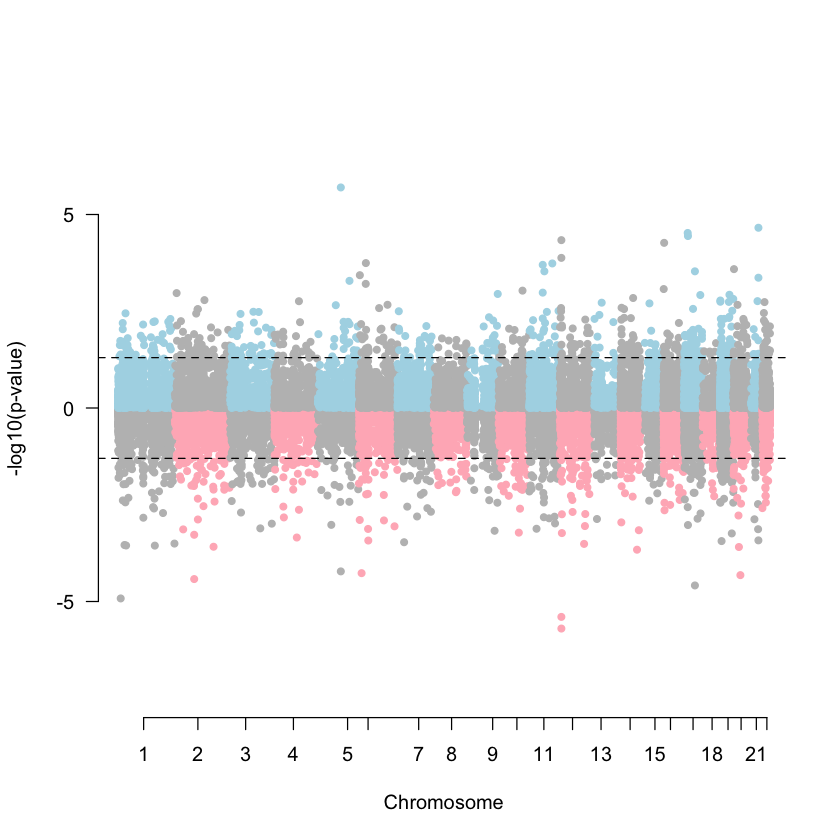

In [3]:
ops=control=mht.control(cutoffs=c(-log10(0.05)),labels=paste("Chr",1:22,sep=""))
#png("Figure2A.png",height=3600,width=6000,res=600)
miamiplot(data,chr="CHR",bp="P_start",p="q_females",pr="q_males",snp="Probe_Id",lcols = c(),
          col = c("lightblue", "grey"), col2 = c("grey", "lightpink"),ylab="-log10(p-value)")
abline(h = -log10(0.05),lty = 2, lwd = 1)
abline(h = log10(0.05),lty = 2, lwd = 1)
#dev.off()

## Panel B - Mean log2 fold changes between post dexamethasone and baseline colored by identification of etranscripts in combined analysis (n = 46 transcripts), females (n = 567) or males (n = 616). 

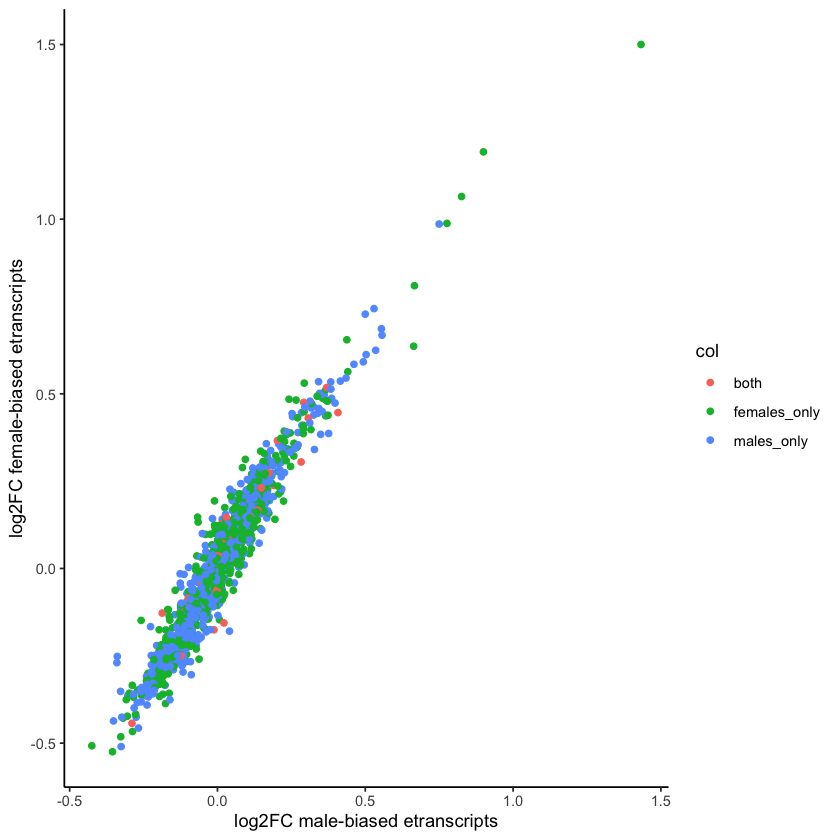

In [8]:
male.eqtl = read.csv("Tables/SupplementaryTable_6_males_GR_2020.csv")
female.eqtl = read.csv("Tables/SupplementaryTable_5_females_GR_2020.csv")

both= read.delim("data/fig1_DEresults.txt")
both$col="neither"
male_fe=intersect(female.eqtl$Probe_Id, male.eqtl$Probe_Id)
#length(male_fe)#46
both[ both$X %in% male_fe,]$col="both"
m_only=setdiff(male.eqtl$Probe_Id,female.eqtl$Probe_Id) 
#length(m_only)#616
both[ both$X %in% m_only,]$col="males_only"
fe_only=setdiff(female.eqtl$Probe_Id, male.eqtl$Probe_Id) 
#length(fe_only)#567
both[ both$X %in% fe_only,]$col="females_only"

ggplot(data = both[ both$col!="neither",], aes(x = log2FC.males, y = log2FC.females, 
colour = col)) +geom_point()+ theme_classic()+ xlab("log2FC male-biased etranscripts")+
ylab("log2FC female-biased etranscripts")

## Panel C - Upset plot displaying the overlapping significant GR-response etranscripts identified in combined analysis, males, and females. The majority of these transcripts were specific to females (91%, n = 193), whereas 68 (59%) transcripts were specific to males and 74 (57%) transcripts were found in the combined eQTL analysis. 

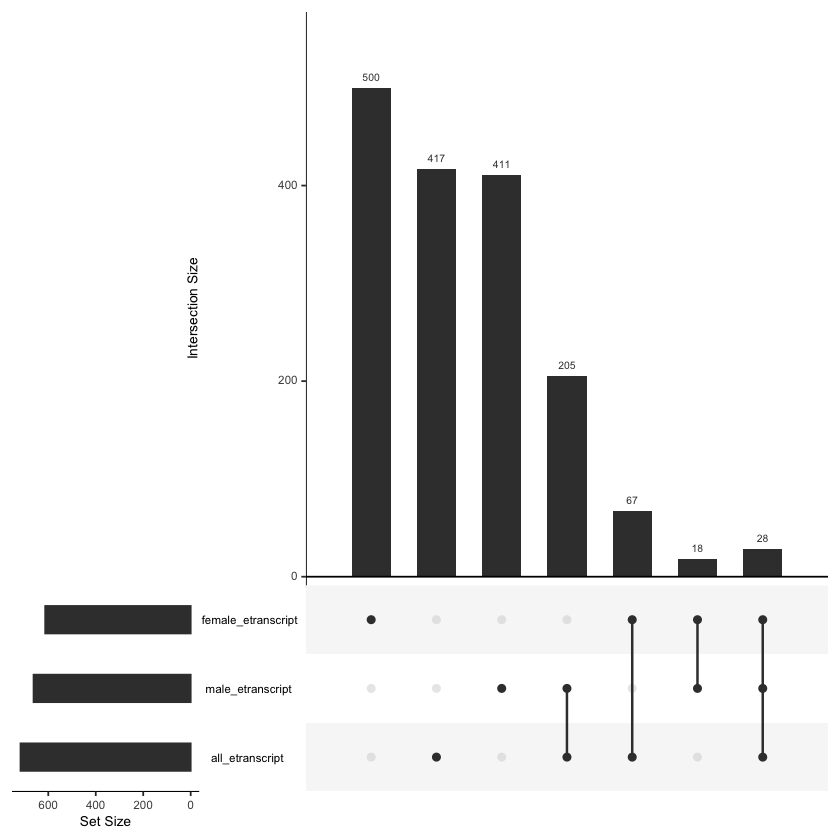

In [16]:
all.eqtl = read.csv("Tables/SupplementaryTable_4_all_GReQTLs_2020.csv")

listInput <- list(male_etranscript = as.character(unique(male.eqtl$Probe_Id)),
                  female_etranscript = as.character(unique(female.eqtl$Probe_Id)),
                  all_etranscript = as.character(unique(all.eqtl$Probe_Id)))

upset(fromList(listInput), nsets=10)

## Panel D - Balloon plot showing the frequency of transcripts found in 1) females but not the combined analysis, 2) the combined analysis, and 3) males but not the combined analysis, across GR-DE transcripts, etranscripts, and etranscript-eSNP pairs. In the GR-DE analysis, the majority of transcripts are identified in the combined analysis, whereas etranscripts and eSNP pairs (eQTLs) show more of an even distribution across females, combined, and males. Maximum fold changes were higher in female etranscripts relative to males

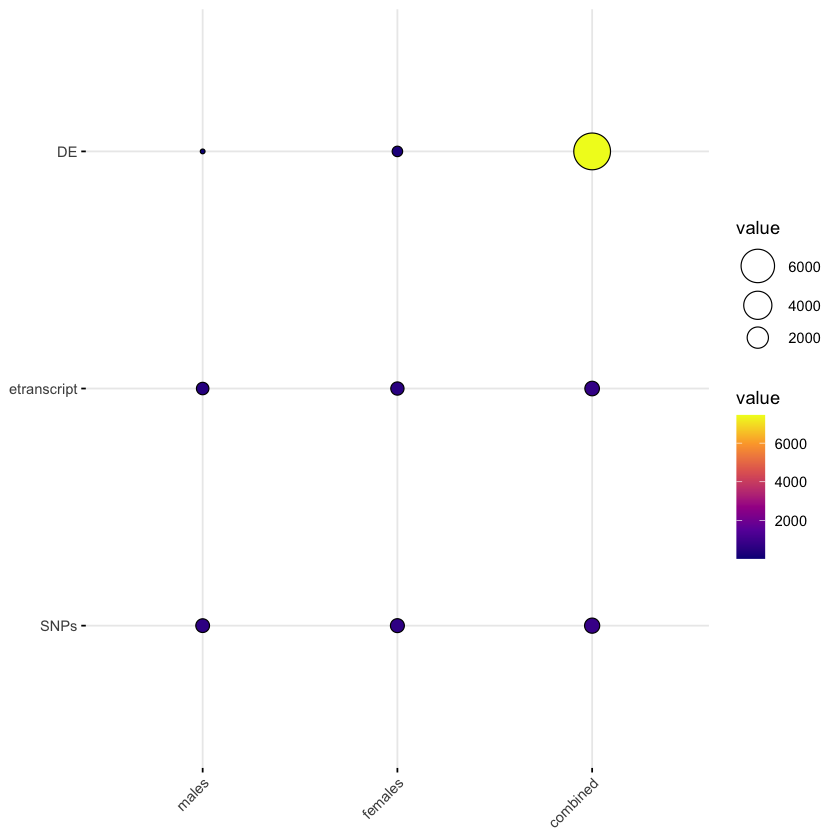

In [20]:
DE <- c(15, 254, 7452)
etranscript<- c(447, 540, 717)
SNPs <- c(603,631,804)

ballon_table <- rbind(DE, etranscript, SNPs)
colnames(ballon_table) <- c("males", "females", "combined")

ggballoonplot(ballon_table, fill = "value")+scale_fill_viridis_c(option = "C")

## Panel E-F - Boxplots of overlapping significant GR-DE transcripts and etranscripts. Gene expression is stratified by eSNP and shown for females and males.




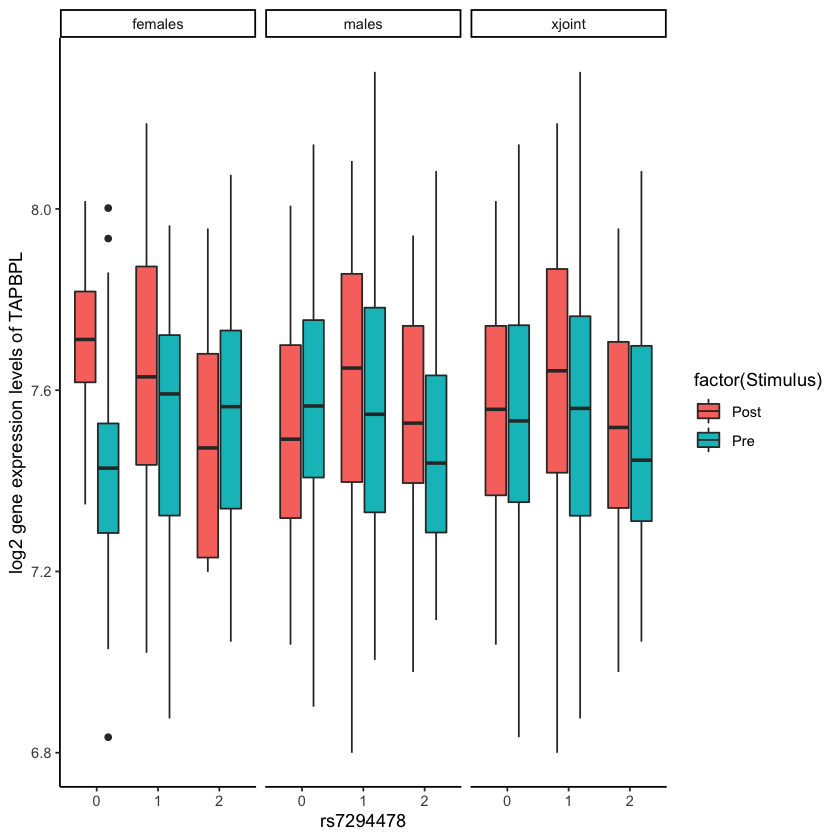

In [14]:
#female specific GR-response eQTL
exampleF = readRDS("data/fig2E_female_eQTL.rds")
#pdf("ILMN_1805449.pdf")
ggplot(na.omit(exampleF), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs7294478")+ylab("log2 gene expression levels of TAPBPL")
#dev.off()

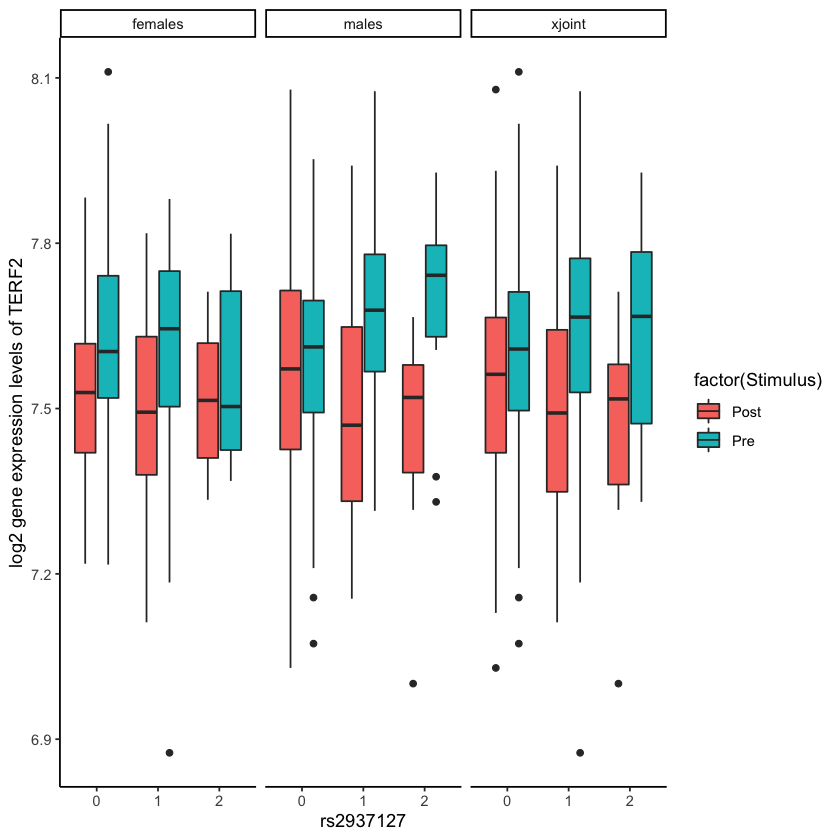

In [15]:
#male specific GR-response eQTL
exampleM = readRDS("data/fig2F_male_eQTL.rds")
#pdf("ILMN_1768488.pdf")
ggplot(na.omit(exampleM), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs2937127")+ylab("log2 gene expression levels of TERF2")
#dev.off()